<a href="https://colab.research.google.com/github/aliiabedii/CNNlearn/blob/main/waveletGoogLeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -av "/content/Data" "/content/drive/MyDrive/Data"

'/content/Data' -> '/content/drive/MyDrive/Data'
'/content/Data/healthy' -> '/content/drive/MyDrive/Data/healthy'
'/content/Data/healthy/CWT_Row_0_Class_healthy.png' -> '/content/drive/MyDrive/Data/healthy/CWT_Row_0_Class_healthy.png'
'/content/Data/healthy/.ipynb_checkpoints' -> '/content/drive/MyDrive/Data/healthy/.ipynb_checkpoints'
'/content/Data/healthy/CWT_Row_2_Class_healthy.png' -> '/content/drive/MyDrive/Data/healthy/CWT_Row_2_Class_healthy.png'
'/content/Data/healthy/CWT_Row_3_Class_healthy.png' -> '/content/drive/MyDrive/Data/healthy/CWT_Row_3_Class_healthy.png'
'/content/Data/healthy/CWT_Row_4_Class_healthy.png' -> '/content/drive/MyDrive/Data/healthy/CWT_Row_4_Class_healthy.png'
'/content/Data/healthy/CWT_Row_17_Class_healthy.png' -> '/content/drive/MyDrive/Data/healthy/CWT_Row_17_Class_healthy.png'
'/content/Data/healthy/CWT_Row_6_Class_healthy.png' -> '/content/drive/MyDrive/Data/healthy/CWT_Row_6_Class_healthy.png'
'/content/Data/healthy/CWT_Row_7_Class_healthy.png' -> 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cwt, morlet
from PIL import Image
import scipy.io as sio
import matplotlib.pyplot as plt

In [ ]:
ECGData = sio.loadmat("ECGData.mat")


In [ ]:


# Load the MATLAB file
ECGData = sio.loadmat("ECGData.mat")

# List the variables and their shapes
print(sio.whosmat("ECGData.mat"))


[('ECGData', (1, 1), 'struct')]


In [ ]:
# Access the substructures
Data = ECGData['ECGData']['Data'][0, 0]  # Get the matrix as a numpy array
labels = ECGData['ECGData']['labels'][0, 0]  # Get the labels as a numpy array of objects
labels = [label[0].item() for label in labels.flatten()]
Data[:,:].shape
# plt.plot(Data[100,:])
# labels

(120, 18000)

In [ ]:
# Define the sampling frequency and the signal length
Fs = 100
signalLength = 1000

# Define the wavelet parameters
scales = 2 ** np.arange(1, 9)  # Scales for the wavelet transform
w = 6  # Wavelet parameter for the Morlet wavelet
freqs = w * Fs / (2 * np.pi * scales)  # Frequencies corresponding to the scales

# Load the ECG data
# sig = ECGData.Data[0, :signalLength]
# ECGData = mt.loadmat("ECGData.mat")


# Compute the continuous wavelet transform using the Morlet wavelet
cfs = cwt(Data, morlet, scales, w=w)
cfs = cwt(Data[0,:], morlet(scales), scales)

# Compute the continuous wavelet transform using the Morlet wavelet
cfs = cwt((Data[1, :]), morlet(scales, s=2), scales)



# Plot the scalogram
t = np.arange(signalLength) / Fs
plt.figure()
plt.pcolor(t, freqs, np.abs(cfs), shading='interp')
plt.yscale('log')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Scalogram')
plt.show()


TypeError: ignored

<ipython-input-116-d2e1d9821efd>:13: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.imshow(cwt_row, aspect='auto', extent=[0, time[-1], 0, len(scales)], cmap='jet')


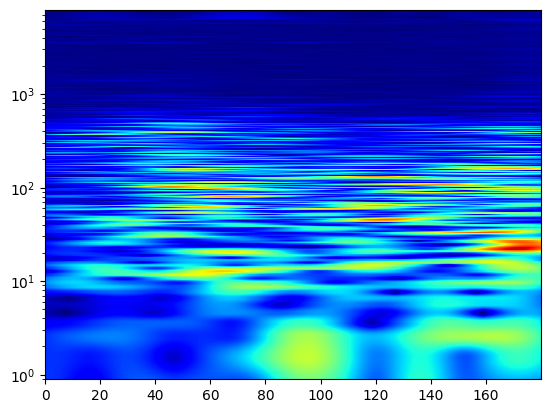

In [ ]:
scales = np.arange(1, 8000)
sampling_frequency = 100
cwt_results = []
# test=Data[0,0:1000]
test=Data[100,:]

time = np.arange(len(test)) / sampling_frequency
# time = time[:1000]
cwt_row = np.abs(cwt(test, morlet, scales))
cwt_row.shape
time.shape
plt.yscale('log')
plt.imshow(cwt_row, aspect='auto', extent=[0, time[-1], 0, len(scales)], cmap='jet')


In [ ]:
        cwt_result = np.abs(cwt(Data[1, :], cwtmatr, scales))

        # Visualize CWT result
        plt.figure(figsize=(6, 6))
        plt.imshow(cwt_result, aspect='auto', extent=[0, signal_length / sampling_frequency, 0, len(scales)],
                   cmap='jet')
        plt.colorbar(label='Magnitude')
        plt.title(f'CWT Result for Row {i}')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Scale')

NameError: ignored

chatgpt1


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat
from scipy.signal import cwt, cwtmatr, find_peaks

def create_rgb_from_tf(ecg_data, parent_folder, child_folder):
    # This function is only intended to support the ECGAndDeepLearningExample.
    # It may change or be removed in a future release.

    image_root = os.path.join(parent_folder, child_folder)
    os.makedirs(image_root, exist_ok=True)

    data = ecg_data['Data']
    labels = ecg_data['labels']

    _, signal_length = data.shape

    # Adjust parameters based on your requirements
    sampling_frequency = 100  # Hz
    scales = np.arange(1, 128)

    for i in range(data.shape[0]):
        # Compute continuous wavelet transform
        cwt_result = np.abs(cwt(data[i, :], cwtmatr, scales))

        # Visualize CWT result
        plt.figure(figsize=(6, 6))
        plt.imshow(cwt_result, aspect='auto', extent=[0, signal_length / sampling_frequency, 0, len(scales)],
                   cmap='jet')
        plt.colorbar(label='Magnitude')
        plt.title(f'CWT Result for Row {i}')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Scale')

        # Save the CWT result as an image
        img_loc = os.path.join(image_root, str(labels[i]))
        os.makedirs(img_loc, exist_ok=True)
        img_file_name = f'{str(labels[i])}_{i}.png'
        img_path = os.path.join(img_loc, img_file_name)
        plt.savefig(img_path)
        plt.close()

if __name__ == "__main__":
    # Assume you have loaded the MATLAB data into a Python dictionary named 'ecg_data'
    # Replace 'your_parent_folder' and 'your_child_folder' with actual folder paths
    create_rgb_from_tf(ecg_data, 'your_parent_folder', 'your_child_folder')


ImportError: ignored

In [ ]:
scales = np.arange(1, 128)

# Perform CWT on each row of the data matrix and store results in a list
cwt_results = []
for row in Data:
    cwt_row = np.abs(cwt(row, morlet, scales))
    cwt_results.append(cwt_row)

# Convert the list to a numpy array
cwt_results = np.array(cwt_results)

# Visualize the results (for illustration, you can customize this part)
plt.figure(figsize=(12, 6))
plt.imshow(cwt_results, aspect='auto', extent=[0, 8000, 0, len(Data)], cmap='jet')
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform')
plt.xlabel('Sample Index')
plt.ylabel('Row Index')
plt.show()

# cwt_results.shape
plt.figure(figsize=(120, 120))
plt.imshow(cwt_results[1,:])
plt.yscale("log")

TypeError: ignored

In [ ]:

# Define the helper function to create RGB images from the wavelet transform
def helperCreateRGBfromTF(ECGData, parentFolder, childFolder):
    # This function is only intended to support the ECGAndDeepLearningExample.
    # It may change or be removed in a future release.

    # Create the image root folder
    imageRoot = os.path.join(parentFolder, childFolder)

    # Get the data and labels
    data = ECGData.Data
    labels = ECGData.Labels

    # Get the number of signals and the signal length
    r, signalLength = data.shape

    # Create the wavelet filter bank
    scales = 2 ** np.arange(1, 9)
    w = 6
    freqs = w * Fs / (2 * np.pi * scales)

    # Loop over the signals
    for ii in range(r):
        # Compute the wavelet transform
        cfs = cwt(data[ii, :], morlet, scales, w=w)

        # Convert the absolute values to an RGB image
        im = Image.fromarray(np.uint8(plt.cm.jet(np.abs(cfs)) * 255))

        # Create the image location folder
        imgLoc = os.path.join(imageRoot, labels[ii])

        # Create the image file name
        imFileName = labels[ii] + '_' + str(ii) + '.jpg'

        # Save the resized image
        im.resize((224, 224)).save(os.path.join(imgLoc, imFileName))


sample


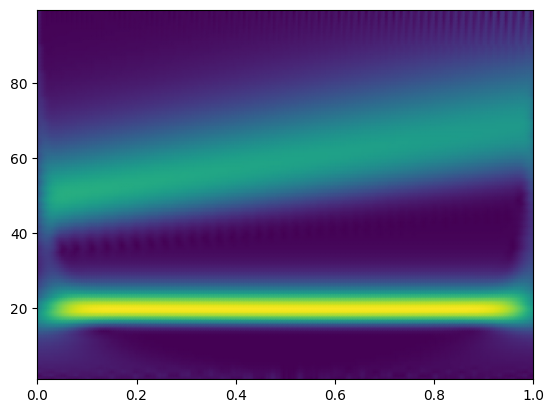

(100,)

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

t, dt = np.linspace(0, 1, 200, retstep=True)
fs = 1/dt
w = 6.
sig = np.cos(2*np.pi*(50 + 10*t)*t) + np.sin(40*np.pi*t)
freq = np.linspace(1, fs/2, 100)
widths = w*fs / (2*freq*np.pi)
cwtm = signal.cwt(sig, signal.morlet2, widths, w=w)
plt.pcolormesh(t, freq, np.abs(cwtm), cmap='viridis', shading='gouraud')
plt.show()
sig.shape
dt.shape
freq.shape

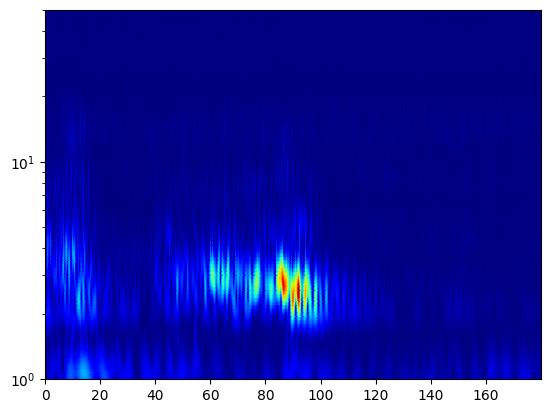

(18000,)

In [ ]:
# t = np.linspace(0, len(Data[0]), 180)
fs = 100
t = np.arange(len(Data[0])) / fs


w = 6.    #defult=6.0
sig = Data[0,:]
# freq = np.linspace(1, fs/2, 100)
freq = np.logspace(np.log10(1), np.log10(fs/2), 100)

widths = w*fs / (2*freq*np.pi)
cwtm = signal.cwt(sig, signal.morlet2, widths, w=w)
plt.yscale("log")
# plt.imshow(np.abs(cwtm), aspect='auto', extent=[0, time[-1], 0, len(scales)], cmap='jet')

plt.pcolormesh(t, freq, np.abs(cwtm), cmap='jet', shading='gouraud')
# plt.pcolormesh(t, freq, np.abs(cwtm), cmap='viridis', shading='gouraud')
plt.show()
t.shape

<ipython-input-48-5bfaf109003c>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet_colormap = cm.get_cmap('jet', 128)


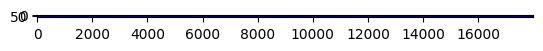

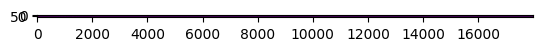

In [ ]:
from matplotlib import cm
from skimage import img_as_ubyte, img_as_float
from skimage.io import imsave
from skimage.transform import resize

cwtm = abs(cwtm)
rescaled_cwtm = (cwtm - np.min(cwtm)) / (np.max(cwtm) - np.min(cwtm))
# uint8_cstm = (rescaled_cwtm * 255).astype(np.uint8)
uint8_cstm = img_as_ubyte(rescaled_cwtm)
# Create colormap
jet_colormap = cm.get_cmap('jet', 128)
rgb_image = jet_colormap(uint8_cstm)
# Map indexed image to RGB
# rgb_image = jet_colormap(uint8_cstm)

# Display the image
# plt.yscale("log")
plt.imshow(rgb_image)
plt.show()

# plt.pcolormesh(t, freq, uint8_cstm, cmap='jet', shading='gouraud')

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cwt, morlet
from google.colab import drive
from scipy import signal
from matplotlib.colors import Normalize
import imageio





# Assuming you have loaded your data into the variables 'Data' and 'Labels'
# Replace these with your actual data and labels
# For demonstration, I'm assuming 'Labels' is a list of strings representing classes
# and 'Data' is a 2D NumPy array where each row corresponds to a signal

# Example data (replace this with your actual data)
# Data = np.random.rand(120, 1000)
# labels = ['healthy'] * 10 + ['damaged'] * 110

# Create a folder named 'Data' in Google Colab
colab_data_folder = '/content/Data'
os.makedirs(colab_data_folder, exist_ok=True)

# Get unique classes from the labels
unique_classes = set(labels)
# unique_classes = set(label[0] for label in labels.flatten())

# Create subfolders for each class
class_folders = {}
for class_name in unique_classes:
    class_folder = os.path.join(colab_data_folder, class_name)
    os.makedirs(class_folder, exist_ok=True)
    class_folders[class_name] = class_folder

# Set up parameters for CWT
fs = 100
w = 6.0
freq = np.logspace(np.log10(1), np.log10(fs/2), 100)

# Iterate through each row of the data
for i in range(Data.shape[0]):
    sig = Data[i, :]
    widths = w*fs / (2*freq*np.pi)
    cwt_result = np.abs(cwt(sig, signal.morlet2,widths,w=w))
    # cwt_result = (cwt_result - np.min(cwt_result)) / (np.max(cwt_result) - np.min(cwt_result))
    # Visualize and save CWT image
    plt.figure(figsize=(3.2, 3.2), dpi=100)
    plt.pcolormesh(np.arange(len(sig)) / fs , freq, cwt_result, cmap='jet', shading="gouraud")
    # plt.colorbar(label='Magnitude')
    # plt.axis('square')  # Set the aspect ratio to be equal
    plt.yscale("log")  # Set y-axis to logarithmic scale
    plt.axis('off')  # Turn off axis
    # plt.title(f'CWT Result for Row {i} - Class: {labels[i]}')

    # labels = [label[0].item() for label in labels.flatten()]

    # Save image to the corresponding class folder in Google Colab
    # label = labels[i][0].item() if labels[i].size else None
    # class_folder = class_folders.get(labels)
    # Save image to the corresponding class folder in Google Colab
    # unique_classes = set(label[0] for label in labels.flatten())

    class_folder = class_folders.get(labels[i])
    if class_folder:
        image_name = f'CWT_Row_{i}_Class_{labels[i]}.png'
        image_path = os.path.join(class_folder, image_name)
        plt.savefig(image_path, bbox_inches='tight', pad_inches=0, transparent=True)
        img = imageio.imread(image_path)
        rgb_img = img[:224, :224, :3]  # Keep only the RGB channels
        imageio.imwrite(image_path, rgb_img)  # Save as RGB
        plt.close()


# Notify that the process is completed
print("CWT images have been generated and stored in Google Colab.")


In [ ]:
ax1= plt.imread("/content/Data/damage/CWT_Row_86_Class_damage.png")
ax1.shape

(224, 224, 3)

In [ ]:
import pandas as pd
from PIL import Image
import numpy as np
import os

# Function to get numerical label from filename
def get_label_from_filename(filename):
    if 'healthy' in filename:
        return 0
    elif 'damaged' in filename:
        return 1
    else:
        return -1  # Modify this based on your specific labels

# Directory where RGB images are saved
image_dir = '/content/Data/damage'

# List to store flattened image arrays and labels
image_arrays = []
labels = []

# Iterate through images in the directory
for filename in os.listdir(image_dir):
    if filename.endswith('.png'):
        file_path = os.path.join(image_dir, filename)
        # label = get_label_from_filename(filename)
        label = 0 if 'healthy' in filename else 1

        # Open image
        img = Image.open(file_path)


        # Convert image to a NumPy array
        img_array = np.array(img).reshape(-1)  # Flatten the 3D array to 1D

        # Append the flattened image array and label to the lists
        image_arrays.append(img_array)
        labels.append(label)

# Create a DataFrame and save it to CSV
X = np.array(image_arrays)
y = np.array(labels)


# Combine image arrays and labels into one matrix
data_matrix = np.column_stack((X, y))

# Save the matrix as a CSV file
csv_filename = '/content/Data.csv'
np.savetxt(csv_filename, data_matrix, delimiter=',', header='col1,col2,col3,...,label', comments='')

print(f'Data has been saved to {csv_filename}')

# df = pd.DataFrame({'Label': y, 'Image Array':X})
# df.to_csv('/content/Data.csv', index=False)

Data has been saved to /content/Data.csv


store data in the csv file

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define path to your data
data_dir = '/content/drive/MyDrive/data'

# Define image dimensions
img_height, img_width = 224, 224

# Create an ImageDataGenerator with optional data augmentation
datagen = ImageDataGenerator(
    horizontal_flip=True,
    validation_split= 0.2,  # 20% of the data will be used for validation

)

# Create an ImageDatastore for both training and validation data
training_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='binary',  # Use 'binary' for binary classification
    subset='training',  # Specify 'validation' for the validation subset
    shuffle=True
)
validation_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),  # Resize images to (224, 224)
    batch_size=32,  # Batch size
    class_mode='binary',  # Assuming you have multiple classes
    subset='validation',  # Specify that this is the validation set
    shuffle=True  # Shuffle the data
)


Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


# utils keras data preprosesing

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras

# Define path to your data
data_dir = '/content/drive/MyDrive/data'

# Define image dimensions
img_height, img_width = 224, 224

# Create an ImageDataGenerator with optional data augmentation
datagen = ImageDataGenerator(
    horizontal_flip=True,
    validation_split= 0.2,  # 20% of the data will be used for validation

)

# Create an ImageDatastore for both training and validation data
training_data =tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    seed=42,
    image_size=(img_height, img_width),
    batch_size=32,
    subset='training',  # Specify 'validation' for the validation subset
    shuffle=True
)
validation_data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    image_size=(img_height, img_width),  # Resize images to (224, 224)
    seed=42,
    batch_size=32,  # Batch size
    subset='validation',  # Specify that this is the validation set
    shuffle=True  # Shuffle the data
)

Found 200 files belonging to 2 classes.
Using 160 files for training.
Found 200 files belonging to 2 classes.
Using 40 files for validation.


In [ ]:
batch_data, batch_labels = next(data)
batch_labels

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras import Model

# Build a simple model (VGG16 as an example)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own dense layers on top
x = layers.Flatten()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation='sigmoid')(x)

model = Model(base_model.input, output)


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


NameError: ignored

In [ ]:

# Train the model using the data generators
model.fit(training_data,validation_data=validation_data, epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 223s 70s/step - loss: 0.0000e+00 - accuracy: 0.7912
Epoch 2/5
3/3 [==============================] - 199s 70s/step - loss: 0.0000e+00 - accuracy: 0.8132
Epoch 3/5
3/3 [==============================] - 205s 65s/step - loss: 0.0000e+00 - accuracy: 0.8132
Epoch 4/5
3/3 [==============================] - 211s 67s/step - loss: 0.0000e+00 - accuracy: 0.8132
Epoch 5/5
3/3 [==============================] - 203s 66s/step - loss: 0.0000e+00 - accuracy: 0.8132


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

# Assuming you have loaded your data into the variables 'Data' and 'Labels'
# Replace these with your actual data and labels

# Example data (replace this with your actual data)
# Data = np.random.rand(120, 224, 224, 3)
# labels = np.random.randint(2, size=(120,))

# Create an ImageDataGenerator with optional data augmentation
# datagen = ImageDataGenerator(
#     horizontal_flip=True,
#     vertical_flip=True,
#     rotation_range=20,
#     validation_split=0.15
# )

# Split data into training and validation sets
# train_data = datagen.flow(data_dir, labels, subset='training')
# val_data = datagen.flow(data_dir, labels, subset='validation')

# Load InceptionV3 model pre-trained on ImageNet
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a custom model on top of the pre-trained base
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    # layers.Dense(100, activation='softmax'),
    layers.Dropout(0.6),
    layers.Dense(1, activation='sigmoid')  # Binary classification, change to suit your problem
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the data generators
history = model.fit(training_data, validation_data=validation_data, epochs=50)

# Save the model if needed
# model.save('your_model.h5')


83683744/83683744 [==============================] - 4s 0us/step
Epoch 1/50
5/5 [==============================] - 104s 13s/step - loss: 13.3406 - accuracy: 0.4812 - val_loss: 11.9675 - val_accuracy: 0.4500
Epoch 2/50
5/5 [==============================] - 57s 12s/step - loss: 8.0437 - accuracy: 0.5875 - val_loss: 8.3202 - val_accuracy: 0.6750
Epoch 3/50
5/5 [==============================] - 48s 10s/step - loss: 7.7078 - accuracy: 0.6187 - val_loss: 6.7343 - val_accuracy: 0.5500
Epoch 4/50
5/5 [==============================] - 58s 13s/step - loss: 4.5921 - accuracy: 0.7312 - val_loss: 4.9522 - val_accuracy: 0.7250
Epoch 5/50
5/5 [==============================] - 59s 13s/step - loss: 4.6821 - accuracy: 0.6625 - val_loss: 4.4939 - val_accuracy: 0.5250
Epoch 6/50
5/5 [==============================] - 46s 10s/step - loss: 4.3762 - accuracy: 0.6438 - val_loss: 3.5488 - val_accuracy: 0.7250
Epoch 7/50
5/5 [==============================] - 62s 13s/step - loss: 3.2156 - accuracy: 0.7125 -

['Ahealthy', 'damage']


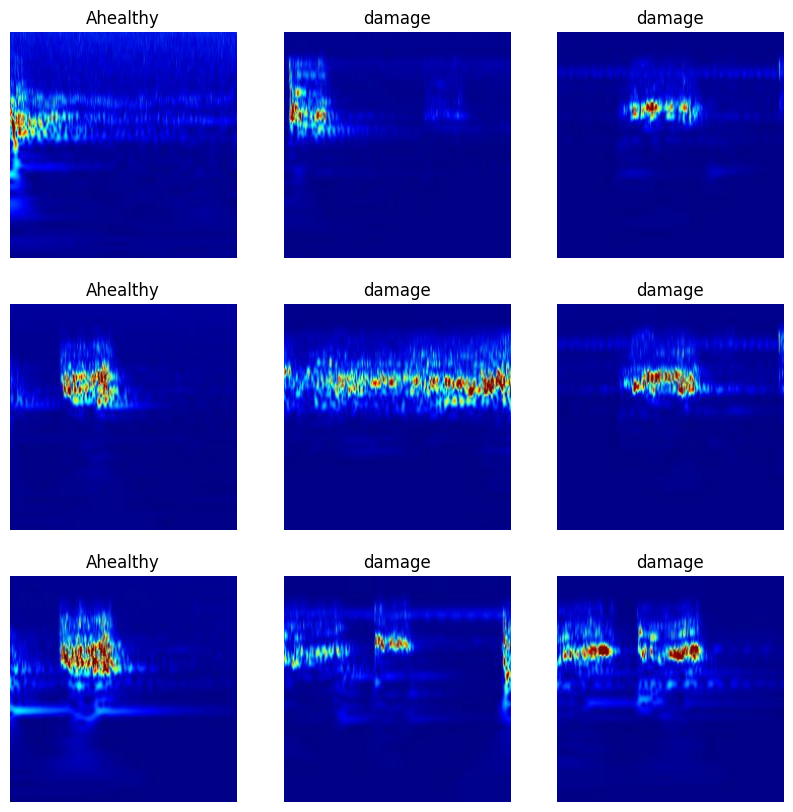

In [ ]:
import matplotlib.pyplot as plt

class_names = training_data.class_names
print(class_names)

plt.figure(figsize=(10, 10))
for images, labels in training_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")